In [113]:
import pandas as pd

bucket='buckettitanicteste'

file_key = 'Data/train.csv'

s3uri = 's3://{}/{}'.format(bucket, file_key)

df_train = pd.read_csv(s3uri)

df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [114]:
file_key = 'Data/test.csv'

s3uri = 's3://{}/{}'.format(bucket, file_key)

df_test = pd.read_csv(s3uri)

df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [115]:
df_test.shape

(418, 11)

In [116]:
df_train.shape

(891, 12)

In [117]:
print(df_train['Sex'].value_counts())
print('------------------------------')
print(df_train['Embarked'].value_counts())
print('------------------------------')
print(df_train['Cabin'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
------------------------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64
------------------------------
C23 C25 C27    4
B96 B98        4
G6             4
D              3
E101           3
              ..
D11            1
A23            1
B3             1
D9             1
E46            1
Name: Cabin, Length: 147, dtype: int64


In [118]:
sex_mapping = {
    'female' : 0,
    'male' : 1
}
embarked_mapping = {
    'S' : 0,
    'C' : 1,
    'Q' : 2,
}

df_train['Sex'] = df_train['Sex'].map(sex_mapping)
df_train['Embarked'] = df_train['Embarked'].map(embarked_mapping)
df_test['Sex'] = df_test['Sex'].map(sex_mapping)
df_test['Embarked'] = df_test['Embarked'].map(embarked_mapping)

In [119]:
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    1  27.0      0   
887                       Graham, Miss. Margaret Edith    0  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    0   NaN      1   
889                              Behr, Mr. Karl Howell    1  26.0      0   
890                                Dooley, Mr. Patrick    1  32.0      0   

     Parch            Ticket     Fare Cabin  Embarked  
0        0         A/5 21171   7.2500   NaN       0.0  
1        0          PC 17599  71.2833   C85       1.0  
2        0  STON/O2. 3101282   7.9250   NaN       0.0  
3        0            113803  53.1000  C123       0.0  
4        0            373450   8.0500   NaN       0.0  
..     ...               ...      ...   ...       ...  
886      0            211536  13.0000   NaN       0.0  
887      0            112053  30.0000   B42       0.0  
888      2        W./C. 6607  23.4500   NaN       0.0  
889      0            111369  30.0000  C148       1.0  
890      0            370376   7.7500   NaN       2.0  

[891 rows x 12 columns]

In [120]:
df_test

PassengerId  Pclass                                          Name  Sex  \
0            892       3                              Kelly, Mr. James    1   
1            893       3              Wilkes, Mrs. James (Ellen Needs)    0   
2            894       2                     Myles, Mr. Thomas Francis    1   
3            895       3                              Wirz, Mr. Albert    1   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   
..           ...     ...                                           ...  ...   
413         1305       3                            Spector, Mr. Woolf    1   
414         1306       1                  Oliva y Ocana, Dona. Fermina    0   
415         1307       3                  Saether, Mr. Simon Sivertsen    1   
416         1308       3                           Ware, Mr. Frederick    1   
417         1309       3                      Peter, Master. Michael J    1   

      Age  SibSp  Parch              Ticket      Fare Cabin  Embarked  
0    34.5      0      0              330911    7.8292   NaN         2  
1    47.0      1      0              363272    7.0000   NaN         0  
2    62.0      0      0              240276    9.6875   NaN         2  
3    27.0      0      0              315154    8.6625   NaN         0  
4    22.0      1      1             3101298   12.2875   NaN         0  
..    ...    ...    ...                 ...       ...   ...       ...  
413   NaN      0      0           A.5. 3236    8.0500   NaN         0  
414  39.0      0      0            PC 17758  108.9000  C105         1  
415  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN         0  
416   NaN      0      0              359309    8.0500   NaN         0  
417   NaN      1      1                2668   22.3583   NaN         1  

[418 rows x 11 columns]

In [134]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [135]:
df_train.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  714.000000   
mean    446.000000    0.383838    2.308642    0.647587   29.699118   
std     257.353842    0.486592    0.836071    0.477990   14.526497   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     223.500000    0.000000    2.000000    0.000000   20.125000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    1.000000   38.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  889.000000  
mean     0.523008    0.381594   32.204208    0.362205  
std      1.102743    0.806057   49.693429    0.636157  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.910400    0.000000  
50%      0.000000    0.000000   14.454200    0.000000  
75%      1.000000    0.000000   31.000000    1.000000  
max      8.000000    6.000000  512.329200    2.000000

In [136]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [137]:
df_train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

<AxesSubplot:>

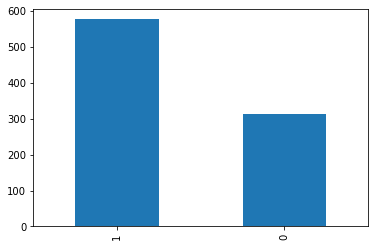

In [139]:
df_train.Sex.value_counts().plot(kind = 'bar')

<AxesSubplot:>

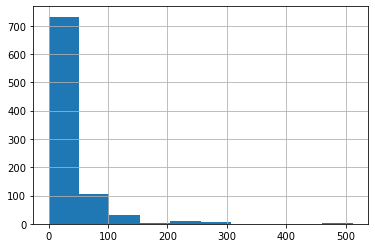

In [138]:
df_train.Fare.hist()

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [147]:
df_copy = df_train

def bar_chart(feature):
    survived = df_copy[df_copy['Survived'] == 1][feature].value_counts()
    dead = df_copy[df_copy['Survived'] == 0][feature].value_counts()
    df_new = pd.DataFrame([survived, dead])
    df_new.index = ['Survived', 'Dead']
    df_new.plot(kind = 'bar', stacked = True, figsize = (10,5))

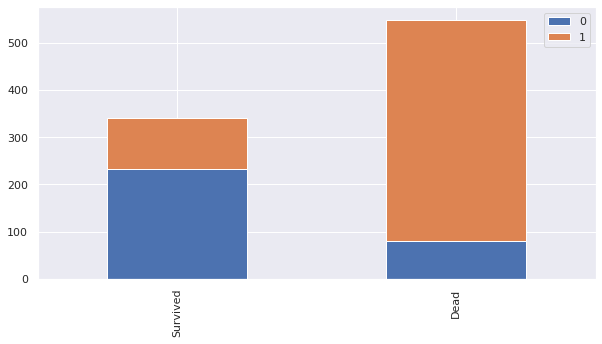

In [148]:
bar_chart('Sex')

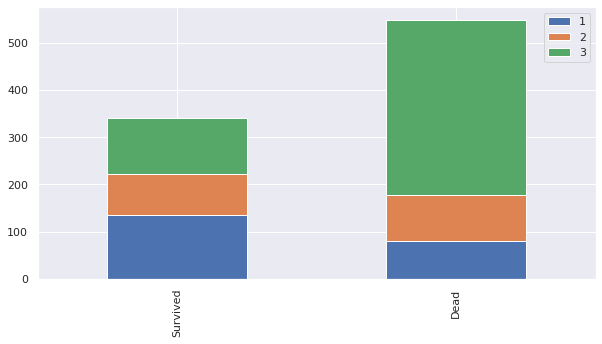

In [150]:
bar_chart('Pclass')

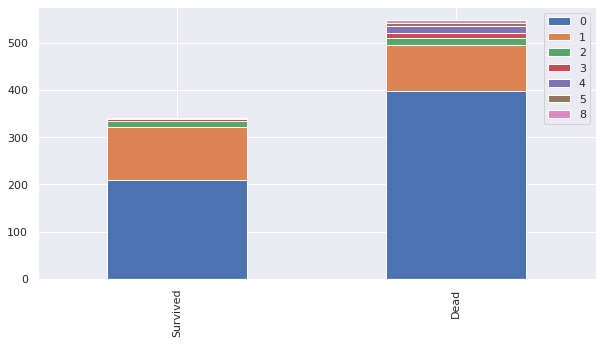

In [151]:
bar_chart('SibSp') #cônjuge 

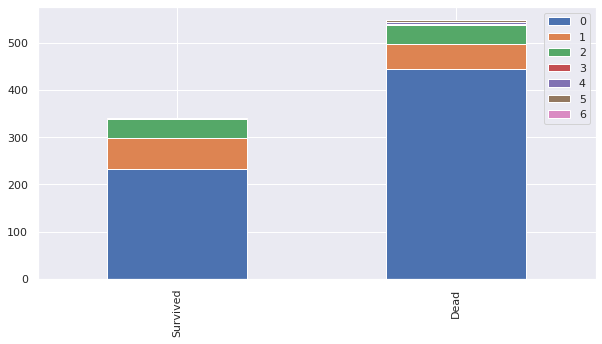

In [152]:
bar_chart('Parch') #pais e filhos 

In [153]:
df_new = [df_train]
for dataset in df_new:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [155]:
df_train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Sir           1
Ms            1
Capt          1
Lady          1
Countess      1
Mme           1
Don           1
Name: Title, dtype: int64

In [157]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3,      
                 "Dr": 3, "Rev": 3,   "Mlle": 3, "Major": 3,         
                 "Col": 3, "Jonkheer": 3, "Sir": 3, "Ms": 3,          
                 "Capt": 3, "Lady": 3, "Countess": 3, "Mme": 3,
                 "Don": 3
                }
for df_train in df_new:
    df_train['Title'] = df_train['Title'].map(title_mapping)

In [158]:
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886                              Montvila, Rev. Juozas    1  27.0      0   
887                       Graham, Miss. Margaret Edith    0  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    0   NaN      1   
889                              Behr, Mr. Karl Howell    1  26.0      0   
890                                Dooley, Mr. Patrick    1  32.0      0   

     Parch            Ticket     Fare Cabin  Embarked  Title  
0        0         A/5 21171   7.2500   NaN       0.0      0  
1        0          PC 17599  71.2833   C85       1.0      2  
2        0  STON/O2. 3101282   7.9250   NaN       0.0      1  
3        0            113803  53.1000  C123       0.0      2  
4        0            373450   8.0500   NaN       0.0      0  
..     ...               ...      ...   ...       ...    ...  
886      0            211536  13.0000   NaN       0.0      3  
887      0            112053  30.0000   B42       0.0      1  
888      2        W./C. 6607  23.4500   NaN       0.0      1  
889      0            111369  30.0000  C148       1.0      0  
890      0            370376   7.7500   NaN       2.0      0  

[891 rows x 13 columns]

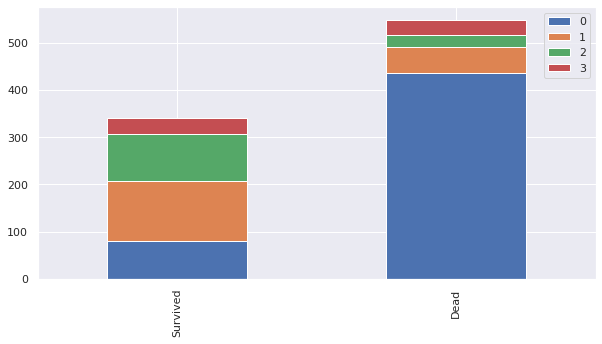

In [159]:
bar_chart('Title')

In [160]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [162]:
missing_ages = df_train[df_train['Age'].isnull()]

In [163]:
missing_ages

PassengerId  Survived  Pclass                                      Name  \
5              6         0       3                          Moran, Mr. James   
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

     Sex  Age  SibSp  Parch      Ticket     Fare Cabin  Embarked  Title  
5      1  NaN      0      0      330877   8.4583   NaN       2.0      0  
17     1  NaN      0      0      244373  13.0000   NaN       0.0      0  
19     0  NaN      0      0        2649   7.2250   NaN       1.0      2  
26     1  NaN      0      0        2631   7.2250   NaN       1.0      0  
28     0  NaN      0      0      330959   7.8792   NaN       2.0      1  
..   ...  ...    ...    ...         ...      ...   ...       ...    ...  
859    1  NaN      0      0        2629   7.2292   NaN       1.0      0  
863    0  NaN      8      2    CA. 2343  69.5500   NaN       0.0      1  
868    1  NaN      0      0      345777   9.5000   NaN       0.0      0  
878    1  NaN      0      0      349217   7.8958   NaN       0.0      0  
888    0  NaN      1      2  W./C. 6607  23.4500   NaN       0.0      1  

[177 rows x 13 columns]

In [164]:
mean_ages = df_train.groupby(['Sex', 'Pclass'])['Age'].mean()

In [165]:
mean_ages

Sex  Pclass
0    1         34.611765
     2         28.722973
     3         21.750000
1    1         41.281386
     2         30.740707
     3         26.507589
Name: Age, dtype: float64

In [166]:
def fill_nan_ages(row):
    
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'], row['Pclass']]
    else:
        return row['Age']

In [168]:
df_train['Age'] = df_train.apply(fill_nan_ages, axis = 1)

In [170]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [171]:
for dataset in df_new:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[ dataset['Age'] > 16 & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[ dataset['Age'] > 26 & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[ dataset['Age'] > 36 & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    

In [172]:
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  3.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  3.0      1   
2                               Heikkinen, Miss. Laina    0  3.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  3.0      1   
4                             Allen, Mr. William Henry    1  3.0      0   
..                                                 ...  ...  ...    ...   
886                              Montvila, Rev. Juozas    1  3.0      0   
887                       Graham, Miss. Margaret Edith    0  3.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"    0  3.0      1   
889                              Behr, Mr. Karl Howell    1  3.0      0   
890                                Dooley, Mr. Patrick    1  3.0      0   

     Parch            Ticket     Fare Cabin  Embarked  Title  
0        0         A/5 21171   7.2500   NaN       0.0      0  
1        0          PC 17599  71.2833   C85       1.0      2  
2        0  STON/O2. 3101282   7.9250   NaN       0.0      1  
3        0            113803  53.1000  C123       0.0      2  
4        0            373450   8.0500   NaN       0.0      0  
..     ...               ...      ...   ...       ...    ...  
886      0            211536  13.0000   NaN       0.0      3  
887      0            112053  30.0000   B42       0.0      1  
888      2        W./C. 6607  23.4500   NaN       0.0      1  
889      0            111369  30.0000  C148       1.0      0  
890      0            370376   7.7500   NaN       2.0      0  

[891 rows x 13 columns]

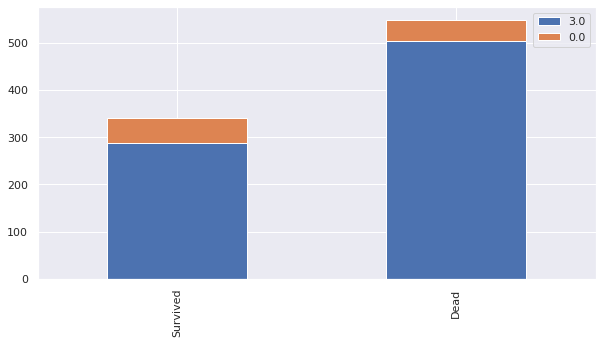

In [173]:
bar_chart('Age')

In [174]:
columns_toDrop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

df_train = df_train.drop(columns = columns_toDrop)

In [175]:
df_train

Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Title
0           0       3    1  3.0      1      0   7.2500      0
1           1       1    0  3.0      1      0  71.2833      2
2           1       3    0  3.0      0      0   7.9250      1
3           1       1    0  3.0      1      0  53.1000      2
4           0       3    1  3.0      0      0   8.0500      0
..        ...     ...  ...  ...    ...    ...      ...    ...
886         0       2    1  3.0      0      0  13.0000      3
887         1       1    0  3.0      0      0  30.0000      1
888         0       3    0  3.0      1      2  23.4500      1
889         1       1    1  3.0      0      0  30.0000      0
890         0       3    1  3.0      0      0   7.7500      0

[891 rows x 8 columns]

In [176]:
X = df_train.drop(['Survived'], axis = 1)
y = df_train['Survived']

In [177]:
X

Pclass  Sex  Age  SibSp  Parch     Fare  Title
0         3    1  3.0      1      0   7.2500      0
1         1    0  3.0      1      0  71.2833      2
2         3    0  3.0      0      0   7.9250      1
3         1    0  3.0      1      0  53.1000      2
4         3    1  3.0      0      0   8.0500      0
..      ...  ...  ...    ...    ...      ...    ...
886       2    1  3.0      0      0  13.0000      3
887       1    0  3.0      0      0  30.0000      1
888       3    0  3.0      1      2  23.4500      1
889       1    1  3.0      0      0  30.0000      0
890       3    1  3.0      0      0   7.7500      0

[891 rows x 7 columns]

In [178]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [181]:
print(f"Shape of Dependent Variable X = {X.shape}")
print(f"Shape of Dependent Variable y= {y.shape}")

Shape of Dependent Variable X = (891, 7)
Shape of Dependent Variable y= (891,)


In [182]:
X = X.values
y = y.values

In [183]:
X = X.astype('float32')
y = y.astype('float32')

In [186]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [187]:
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (623, 7)
Shape of X_test = (268, 7)
Shape of y_train = (623,)
Shape of y_test = (268,)


In [212]:
import boto3
import sagemaker
from sagemaker import get_execution_role

sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

In [322]:
from sagemaker import LinearLearner

#bucket de saída (path)
bucket = 'buckettitanicteste'
prefix = 'sm-out'
output_path = 's3://{}/{}'.format(bucket, prefix)


linear = LinearLearner(role = role,
                       instance_count = 1,
                       instance_type = 'ml.m4.xlarge',
                       predictor_type = 'binary_classifier',
                       output_path = output_path,
                       sagemaker_session = sagemaker_session,
                       epochs = 300,
                       num_models = 32,
                       loss = 'logistic',
                       use_spot_instances = True,
                       max_run = 300,
                       max_wait = 600,
                      )

In [323]:
formatted_train_data = linear.record_set(X_train, labels = y_train)

In [324]:
formatted_validation_data = linear.record_set(X_test, labels = y_test, channel = 'validation')

In [325]:
linear.fit([formatted_train_data,formatted_validation_data])

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2021-09-06 04:33:37 Starting - Starting the training job...
2021-09-06 04:34:00 Starting - Launching requested ML instancesProfilerReport-1630902817: InProgress
...
2021-09-06 04:34:28 Starting - Preparing the instances for training.........
2021-09-06 04:36:00 Downloading - Downloading input data...
2021-09-06 04:36:23 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
[09/06/2021 04:36:48 INFO 139810880583488] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'a

In [218]:
linear_binclass = linear.deploy(initial_instance_count = 1, instance_type = 'ml.t2.medium')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


---------------!

In [220]:
from sagemaker.predictor import csv_serializer, json_deserializer

linear_binclass.ContentType = 'text/csv'
linear_binclass.serializer = csv_serializer
linear_binclass.deserializer = json_deserializer

In [221]:
result = linear_binclass.predict(X_test)
result

The csv_serializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
The json_deserializer has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


{'predictions': [{'score': 0.11881784349679947, 'predicted_label': 0},
  {'score': 0.12009340524673462, 'predicted_label': 0},
  {'score': 0.5615328550338745, 'predicted_label': 1},
  {'score': 0.8962845206260681, 'predicted_label': 1},
  {'score': 0.3476773202419281, 'predicted_label': 0},
  {'score': 0.36091354489326477, 'predicted_label': 0},
  {'score': 0.8880453705787659, 'predicted_label': 1},
  {'score': 0.47624629735946655, 'predicted_label': 0},
  {'score': 0.35353177785873413, 'predicted_label': 0},
  {'score': 0.20724210143089294, 'predicted_label': 0},
  {'score': 0.1189182698726654, 'predicted_label': 0},
  {'score': 0.1492081731557846, 'predicted_label': 0},
  {'score': 0.7550516128540039, 'predicted_label': 1},
  {'score': 0.08766242861747742, 'predicted_label': 0},
  {'score': 0.874570369720459, 'predicted_label': 1},
  {'score': 0.4923325479030609, 'predicted_label': 0},
  {'score': 0.11873918771743774, 'predicted_label': 0},
  {'score': 0.4200287163257599, 'predicted_

In [301]:
predictions = np.array([r['predicted_label'] for r in result['predictions']])
predictions

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0])

In [302]:
ddf = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten(), })
ddf

Actual  Predicted
0       0.0          0
1       0.0          0
2       1.0          1
3       1.0          1
4       0.0          0
..      ...        ...
263     1.0          0
264     1.0          1
265     1.0          1
266     0.0          0
267     0.0          0

[268 rows x 2 columns]

In [ ]:
import seaborn as sns

In [303]:
CM = pd.crosstab(ddf['Actual'], ddf['Predicted'], rownames=['Actual labels'], colnames=['Predicted labels'])

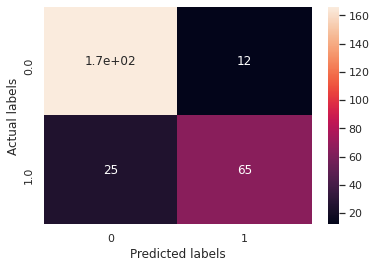

In [304]:
sns.heatmap(CM, annot=True)
plt.show()

In [305]:
from sklearn.metrics import accuracy_score

In [307]:
y_true = np.array(ddf['Actual'])
y_pred = np.array(ddf['Predicted'])

accuracy_score(y_true, y_pred)

0.8619402985074627

In [309]:
from sklearn.metrics import f1_score

In [310]:
f1_score(y_true, y_pred)

0.778443113772455

In [308]:
#deletar end-point

linear_binclass.delete_endpoint()